In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# from scipy import stats
import scipy.optimize as optimize
import scipy.stats as stats
from scipy.optimize import curve_fit
import seaborn as sns
from scipy.stats import entropy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score, precision_recall_curve
import statsmodels.api as sm


In [53]:
all_data = pd.read_csv(r'C:\Users\abhyu\Desktop\Dissertation\DATA\Important Data\all_data.csv')
usernames = all_data['username'].to_list()
# usernames = list((set(usernames)))

unique_list = []
[unique_list.append(x) for x in usernames if x not in unique_list]
print(len(unique_list))

# usernames
len(all_data['language'] == 'English')
len(all_data)

736


37000

In [54]:
all_data_dropped = all_data.dropna(subset=['year'])
print(len(all_data_dropped))
years_of_release = all_data_dropped['year']

film_decades = [int(year/10)*10 for year in years_of_release]

len(film_decades)
all_data_dropped['film_decades'] = film_decades
all_data_dropped['film_decades'].min()
# all_data_dropped

36963


C:\Users\abhyu\AppData\Local\Temp\ipykernel_29076\3758683581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_dropped['film_decades'] = film_decades


1870

In [55]:
possible_decades = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decade_diversity_data = pd.DataFrame(columns=['username', 'decade_diversity_index', 'user_type'])
for user in unique_list:
    user_df = all_data_dropped[all_data_dropped['username'] == user]
    film_decades = user_df['film_decades']
    observed_frequencies = user_df['film_decades'].value_counts().sort_index().tolist()
    user_type = user_df['user_type'].to_list()
    user_type = user_type[0]

    # Create a dictionary with the observed frequencies for each decade
    freq_dict = dict(zip(possible_decades, np.zeros(len(possible_decades), dtype=int)))
    for decade in possible_decades:
        if decade in film_decades.tolist():
            freq_dict[decade] = film_decades.tolist().count(decade)

    observed_counts = np.array([freq_dict[d] for d in possible_decades])
    proportions = observed_counts / np.sum(observed_counts)

    # Calculate Simpson's Diversity Index
    simpsons_diversity = 1 - np.sum(np.square(proportions))
    
    decade_diversity_data.loc[len(decade_diversity_data)] = [user, simpsons_diversity, user_type]

decade_diversity_data



,username,decade_diversity_index,user_type
0,grantmulligan,0.617600,reg_user
1,cman016,0.564800,reg_user
2,austint4829,0.568800,reg_user
3,brockerblade,0.628800,reg_user
4,hsmaduda,0.569600,reg_user
...,...,...,...
731,vegto389,0.662400,pop_user
732,davert22,0.644000,pop_user
733,raimibaby,0.839200,pop_user
734,mstewart9753,0.414827,pop_user


In [56]:
# # sorted_div = diversity_data.sort_values('decade_simpsons_diversity_index')

# grouped = decade_diversity_data.groupby('user_type')

# corr_values = {}
# # for name, group in grouped:
# #     corr = group['decade_simpsons_diversity_index'].corr(group['user_type'].replace({'reg_user': 0, 'pop_user': 1}))
# #     corr_values[name] = corr

# for name, group in grouped:
#     if len(group['user_type'].unique()) == 1:
#         corr_values[name] = np.nan  # If the user type has only one unique value, set correlation to NaN
#     else:
#         corr = group['decade_simpsons_diversity_index'].corr(group['user_type'].replace({'reg_user': 0, 'pop_user': 1}))
#         corr_values[name] = corr
# print(corr_values)
# # Plot the correlation values as a bar plot
# plt.bar(corr_values.keys(), corr_values.values())
# plt.title('Correlation between Diversity Index and User Type')
# plt.xlabel('User Type')
# plt.ylabel('Correlation Coefficient')
# plt.show()

In [57]:
filtered_language_data = all_data.dropna(subset = ['language'])

language_list = filtered_language_data['language'].to_list()

# unique_language_list
unique_language_list = list(set(language_list))


In [58]:
language_diversity_data = pd.DataFrame(columns=['username', 'language_diversity_index'])

for user in unique_list:
    user_df = filtered_language_data[filtered_language_data['username'] == user]
    film_language = user_df['language']
    # print(user_df)
    observed_frequencies = user_df['language'].value_counts().sort_index().tolist()
    # Create a dictionary with the observed frequencies for each decade
    freq_dict = dict(zip(unique_language_list, np.zeros(len(unique_language_list), dtype=int)))
    for language in unique_language_list:
        if language in film_language.tolist():
            freq_dict[language] = film_language.tolist().count(language)

    observed_counts = np.array([freq_dict[d] for d in unique_language_list])
    proportions = observed_counts / np.sum(observed_counts)

    # Calculate Simpson's Diversity Index
    simpsons_diversity = 1 - np.sum(np.square(proportions))
    
    language_diversity_data.loc[len(language_diversity_data)] = [user, simpsons_diversity]


language_diversity_data

,username,language_diversity_index
0,grantmulligan,0.0000
1,cman016,0.0000
2,austint4829,0.1128
3,brockerblade,0.0392
4,hsmaduda,0.2880
...,...,...
731,vegto389,0.0776
732,davert22,0.1152
733,raimibaby,0.1856
734,mstewart9753,0.0776


In [59]:
language_diversity_data.max()
merged_df = pd.merge(language_diversity_data, decade_diversity_data, on='username', how='outer')

print(merged_df)

          username  language_diversity_index  decade_diversity_index user_type
0    grantmulligan                    0.0000                0.617600  reg_user
1          cman016                    0.0000                0.564800  reg_user
2      austint4829                    0.1128                0.568800  reg_user
3     brockerblade                    0.0392                0.628800  reg_user
4         hsmaduda                    0.2880                0.569600  reg_user
..             ...                       ...                     ...       ...
731       vegto389                    0.0776                0.662400  pop_user
732       davert22                    0.1152                0.644000  pop_user
733      raimibaby                    0.1856                0.839200  pop_user
734   mstewart9753                    0.0776                0.414827  pop_user
735    iamthatroby                    0.0000                0.690400  pop_user

[736 rows x 4 columns]


Scatter Plot: DECADE DIV x LANGUAGE DIV

In [60]:
# corr = merged_df['language_diversity_index'].corr(merged_df['decade_diversity_index'])

# # Plot the scatter plot
# plt.scatter(merged_df['language_diversity_index'], merged_df['decade_diversity_index'])
# plt.title('Correlation: ' + str(corr))
# plt.xlabel('language_diversity_index')
# plt.ylabel('decade_diversity_index')
# plt.show()

Predictability of taste through user popularity

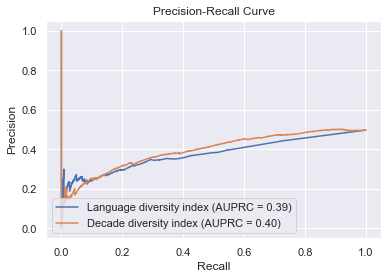

In [61]:
# encode the target variable as numerical values
le = LabelEncoder()
target = merged_df['user_type']
target_encoded = le.fit_transform(target)

# define the predictors
predictors = merged_df[['language_diversity_index', 'decade_diversity_index']]

# calculate the precision-recall curve and AUPRC for each predictor
precision1, recall1, _ = precision_recall_curve(target_encoded, predictors['language_diversity_index'])
auprc1 = average_precision_score(target_encoded, predictors['language_diversity_index'])
precision2, recall2, _ = precision_recall_curve(target_encoded, predictors['decade_diversity_index'])
auprc2 = average_precision_score(target_encoded, predictors['decade_diversity_index'])

# plot the precision-recall curves
plt.plot(recall1, precision1, label='Language diversity index (AUPRC = %0.2f)' % auprc1)
plt.plot(recall2, precision2, label='Decade diversity index (AUPRC = %0.2f)' % auprc2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Simple correlation between Language div and Decade div/ Linear Regression

Correlation Coefficient:  0.16300720010169448


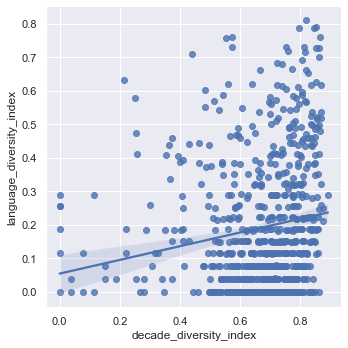

In [62]:

# Calculate the correlation coefficient
corr_coef = merged_df['decade_diversity_index'].corr(merged_df['language_diversity_index'])

# Print the correlation coefficient
print("Correlation Coefficient: ", corr_coef)

# Set the plot style
sns.set(style="darkgrid")

# Plot the linear regression curve
sns.lmplot(x='decade_diversity_index', y='language_diversity_index', data=merged_df)

# Show the plot
plt.show()

Correlation Coefficient:  0.16300720010169448


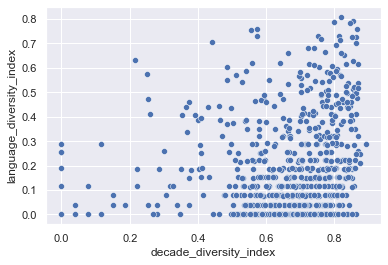

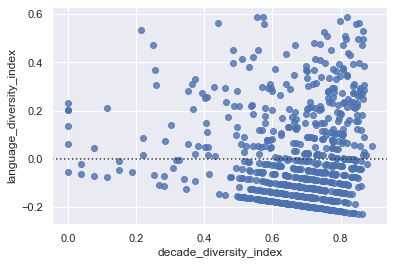

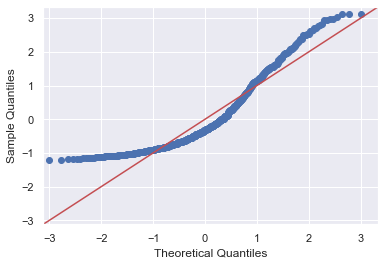

In [63]:
corr_coef = merged_df['decade_diversity_index'].corr(merged_df['language_diversity_index'])
print("Correlation Coefficient: ", corr_coef)

# Create a scatterplot
sns.scatterplot(x='decade_diversity_index', y='language_diversity_index', data=merged_df)

# Show the plot
plt.show()

# Create a residual plot
sns.residplot(x='decade_diversity_index', y='language_diversity_index', data=merged_df)

# Show the plot
plt.show()

# Fit a linear regression model
X = merged_df['decade_diversity_index']
Y = merged_df['language_diversity_index']
X = sm.add_constant(X) # add an intercept term
model = sm.OLS(Y, X).fit()

# Create a normal probability plot of the residuals
sm.graphics.qqplot(model.resid, line='45', fit=True)

# Show the plot
plt.show()

Non-linear correlation coefficient:  0.16299883285519792


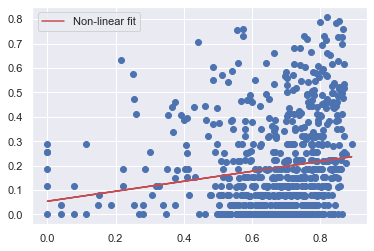

In [64]:
# Load your data into a numpy array
decade_diversity_index = np.array(merged_df['decade_diversity_index'])
language_diversity_index = np.array(merged_df['language_diversity_index'])

# Define a non-linear function to fit the data
def nonlinear_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Use curve_fit to fit the non-linear function to the data
popt, pcov = curve_fit(nonlinear_func, decade_diversity_index, language_diversity_index, maxfev=10000)

# Calculate the correlation coefficient for the non-linear fit
corr_coef, _ = stats.pearsonr(language_diversity_index, nonlinear_func(decade_diversity_index, *popt))
print("Non-linear correlation coefficient: ", corr_coef)

# Create a scatter plot of the data and the non-linear fit
plt.scatter(decade_diversity_index, language_diversity_index)
plt.plot(decade_diversity_index, nonlinear_func(decade_diversity_index, *popt), 'r-', label='Non-linear fit')
plt.legend()
plt.show()

In [65]:

print(merged_df['language_diversity_index'].mean())
median = merged_df['language_diversity_index'].median()
median_decade = merged_df['decade_diversity_index'].median()
print(median)
print(median_decade)

0.19083998877279396
0.11520000000000008
0.7003999999999999


c:\Users\abhyu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\abhyu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


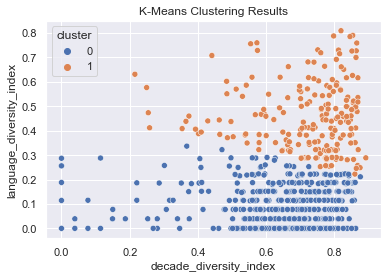

In [75]:
# Create a new DataFrame with the two diversity indices
diversity_df = merged_df[['decade_diversity_index', 'language_diversity_index']]

# Standardize the data using z-score normalization
diversity_df = (diversity_df - np.mean(diversity_df)) / np.std(diversity_df)

# Fit the k-means clustering model with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(diversity_df)

# Add the cluster labels to the original DataFrame
merged_df['cluster'] = kmeans.labels_

# Plot the clusters using a scatter plot
sns.scatterplot(data=merged_df, x='decade_diversity_index', y='language_diversity_index', hue='cluster')
plt.title('K-Means Clustering Results')
plt.show()

In [67]:
# Filter the merged_df DataFrame for each cluster
high_diversity_df = merged_df.loc[merged_df['cluster'] == 1]
low_diversity_df = merged_df.loc[merged_df['cluster'] == 0]

In [68]:
high_diversity_df
# low_diversity_df
cat_merged_df = pd.concat([high_diversity_df, low_diversity_df])
cat_merged_df

,username,language_diversity_index,decade_diversity_index,user_type,cluster
9,orpheus1,0.3200,0.648000,reg_user,1
12,movies4mejason,0.2560,0.776000,reg_user,1
14,youthihara,0.6040,0.753600,reg_user,1
47,bergmanlynch,0.4584,0.826400,reg_user,1
50,gargen,0.7312,0.751200,reg_user,1
...,...,...,...,...,...
731,vegto389,0.0776,0.662400,pop_user,0
732,davert22,0.1152,0.644000,pop_user,0
733,raimibaby,0.1856,0.839200,pop_user,0
734,mstewart9753,0.0776,0.414827,pop_user,0


In [69]:
clustered_all_data = pd.merge(all_data, cat_merged_df, on='username', how='outer', suffixes=('', '_drop'))
clustered_all_data.drop([col for col in clustered_all_data.columns if col.endswith('_drop')], axis=1, inplace=True)
clustered_all_data

,username,movie_id,title,year,length,review,user_rating,letterboxd_views,letterboxd_rating,imdb_rating,...,budget,gross,aspect_ratio,letterboxd_link,imdb_link,tmdb_link,user_type,language_diversity_index,decade_diversity_index,cluster
0,grantmulligan,444600,Jojo Rabbit,2019.0,108.0,So close to being great. Just a bit too satiri...,7.0,1324817,8.12,7.9,...,14000000.0,93757609.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/jojo-rabbit/,http://www.imdb.com/title/tt2584384/maindetails,https://www.themoviedb.org/movie/515001/,reg_user,0.0,0.6176,0
1,grantmulligan,51815,Natural Born Killers,1994.0,118.0,You can just tell this was made by a wannabe T...,6.0,231925,7.08,7.2,...,34000000.0,50283563.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/natural-born-killers/,http://www.imdb.com/title/tt0110632/maindetails,https://www.themoviedb.org/movie/241/,reg_user,0.0,0.6176,0
2,grantmulligan,51521,Full Metal Jacket,1987.0,117.0,Understand why ppl have it as the goat war fil...,9.0,647543,8.26,8.3,...,30000000.0,46358827.0,NaN,https://letterboxd.com/film/full-metal-jacket/,http://www.imdb.com/title/tt0093058/maindetails,https://www.themoviedb.org/movie/600/,reg_user,0.0,0.6176,0
3,grantmulligan,51613,The Green Mile,1999.0,189.0,Stephen King is the definition of having to se...,8.0,655388,8.28,8.6,...,60000000.0,286801374.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/the-green-mile/,http://www.imdb.com/title/tt0120689/maindetails,https://www.themoviedb.org/movie/497/,reg_user,0.0,0.6176,0
4,grantmulligan,71338,The Perks of Being a Wallflower,2012.0,103.0,Moral dilemma on what is the appropriate age o...,8.0,1343186,7.94,7.9,...,13000000.0,33384127.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/the-perks-of-being...,http://www.imdb.com/title/tt1659337/maindetails,https://www.themoviedb.org/movie/84892/,reg_user,0.0,0.6176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,iamthatroby,563017,Shithouse,2020.0,102.0,Unbelievably sweet movie! Insane that this is ...,8.0,46143,7.52,6.9,...,NaN,18370.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/shithouse/,http://www.imdb.com/title/tt11618536/maindetails,https://www.themoviedb.org/movie/637053/,pop_user,0.0,0.6904,0
36996,iamthatroby,333029,Call Me by Your Name,2017.0,132.0,luca put his whole guadanussy into this one.,10.0,1370660,7.86,7.8,...,4000000.0,43143046.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/call-me-by-your-name/,http://www.imdb.com/title/tt5726616/maindetails,https://www.themoviedb.org/movie/398818/,pop_user,0.0,0.6904,0
36997,iamthatroby,33714,Kicking and Screaming,1995.0,96.0,pretty bad but it’s very inspiring to see what...,7.0,47934,6.66,6.7,...,NaN,718490.0,Aspect ratio1.85 : 1,https://letterboxd.com/film/kicking-and-scream...,http://www.imdb.com/title/tt0113537/maindetails,https://www.themoviedb.org/movie/28387/,pop_user,0.0,0.6904,0
36998,iamthatroby,43810,Empire Records,1995.0,90.0,robin tunney an all timer I fear,5.0,111269,7.06,6.7,...,NaN,273188.0,Aspect ratio2.39 : 12.35 : 1,https://letterboxd.com/film/empire-records/,http://www.imdb.com/title/tt0112950/maindetails,https://www.themoviedb.org/movie/13531/,pop_user,0.0,0.6904,0


In [71]:
# clustered_all_data.to_csv(r"C:\Users\abhyu\Desktop\Dissertation\DATA\Important Data\Two K\twoClusterCategorised_allData.csv", index=False)
# clustered_all_data.to_excel(r"C:\Users\abhyu\Desktop\Dissertation\DATA\Important Data\Two K\twoClusterCategorised_allData.xlsx", index=False)

MOD Division

In [1]:
import pandas as pd

In [30]:
df = pd.read_csv(r"C:\Users\abhyu\Desktop\Dissertation\DATA\Important Data\Two K\complete_user_data.csv")
df

,username,language_diversity_index,decade_diversity_index,user_type,cluster,mean_polarity,mean_subjectivity,mean_story_mentioned,mean_filmmaking_mentioned,mean_adjectives_mentioned,mean_review_word_count
0,orpheus1,0.3200,0.648000,reg_user,1,0.150844,0.421877,0.040816,0.061224,0.020408,8.448980
1,movies4mejason,0.2560,0.776000,reg_user,1,0.201875,0.474353,0.039216,0.039216,0.137255,5.196078
2,youthihara,0.6040,0.753600,reg_user,1,0.047131,0.227512,0.000000,0.040000,0.060000,31.160000
3,bergmanlynch,0.4584,0.826400,reg_user,1,0.025130,0.331930,0.060000,0.060000,0.100000,164.840000
4,gargen,0.7312,0.751200,reg_user,1,-0.142726,0.308913,0.000000,0.142857,0.142857,197.857143
...,...,...,...,...,...,...,...,...,...,...,...
731,vegto389,0.0776,0.662400,pop_user,0,0.080260,0.510339,0.250000,0.062500,0.375000,31.625000
732,davert22,0.1152,0.644000,pop_user,0,0.068851,0.455652,0.280000,0.280000,0.340000,49.880000
733,raimibaby,0.1856,0.839200,pop_user,0,0.102276,0.567697,0.076923,0.000000,0.230769,16.692308
734,mstewart9753,0.0776,0.414827,pop_user,0,-0.012824,0.345741,0.000000,0.044444,0.022222,5.400000


In [31]:
bad_df = df.loc[(df['language_diversity_index'] <= 0.4) & (df['decade_diversity_index'] <= 0.4)]

good_df = df.loc[(df['language_diversity_index'] >= 0.55) & (df['decade_diversity_index'] >= 0.55)]


In [34]:
good_df['custom_categorisation'] = 1
bad_df['custom_categorisation'] = 0
good_df
bad_df
new_df = pd.concat([good_df, bad_df])
new_df
new_user_df = pd.merge(df, new_df, on='username', how='outer', suffixes=('', '_drop'))
new_user_df.drop([col for col in new_user_df.columns if col.endswith('_drop')], axis=1, inplace=True)
new_user_df

C:\Users\abhyu\AppData\Local\Temp\ipykernel_36524\2184715019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['custom_categorisation'] = 1
C:\Users\abhyu\AppData\Local\Temp\ipykernel_36524\2184715019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df['custom_categorisation'] = 0


,username,language_diversity_index,decade_diversity_index,user_type,cluster,mean_polarity,mean_subjectivity,mean_story_mentioned,mean_filmmaking_mentioned,mean_adjectives_mentioned,mean_review_word_count,custom_categorisation
0,orpheus1,0.3200,0.648000,reg_user,1,0.150844,0.421877,0.040816,0.061224,0.020408,8.448980,NaN
1,movies4mejason,0.2560,0.776000,reg_user,1,0.201875,0.474353,0.039216,0.039216,0.137255,5.196078,NaN
2,youthihara,0.6040,0.753600,reg_user,1,0.047131,0.227512,0.000000,0.040000,0.060000,31.160000,1.0
3,bergmanlynch,0.4584,0.826400,reg_user,1,0.025130,0.331930,0.060000,0.060000,0.100000,164.840000,NaN
4,gargen,0.7312,0.751200,reg_user,1,-0.142726,0.308913,0.000000,0.142857,0.142857,197.857143,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
731,vegto389,0.0776,0.662400,pop_user,0,0.080260,0.510339,0.250000,0.062500,0.375000,31.625000,NaN
732,davert22,0.1152,0.644000,pop_user,0,0.068851,0.455652,0.280000,0.280000,0.340000,49.880000,NaN
733,raimibaby,0.1856,0.839200,pop_user,0,0.102276,0.567697,0.076923,0.000000,0.230769,16.692308,NaN
734,mstewart9753,0.0776,0.414827,pop_user,0,-0.012824,0.345741,0.000000,0.044444,0.022222,5.400000,NaN


In [35]:
new_user_df.to_csv(r"C:\Users\abhyu\Desktop\Dissertation\DATA\Important Data\Two K\complete_user_data.csv", index=False)

In [ ]:
new_user_df.to_excel(r"C:\Users\abhyu\Desktop\Dissertation\DATA\Important Data\Two K\complete_user_data.xlsx", index=False)